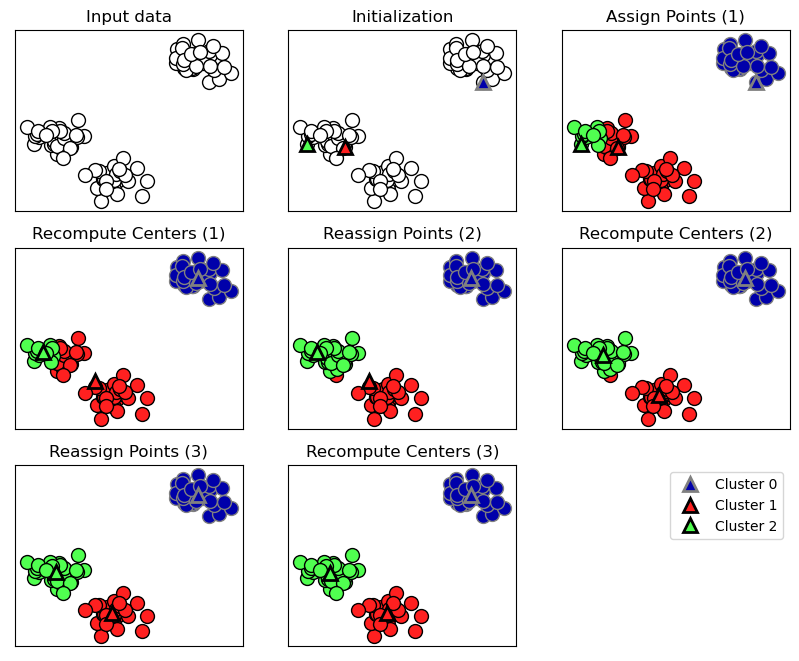

In [1]:
# kmeans 알고리즘에 대한 설명
import mglearn
mglearn.plots.plot_kmeans_algorithm()

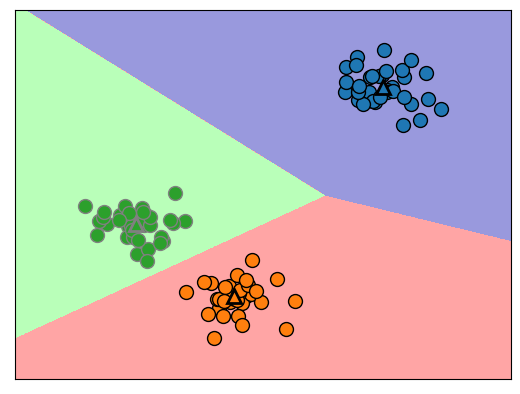

In [2]:
# kmeans 경계 표시
import matplotlib.pyplot as plt
mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [3]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

# 2개의 클러스터로 구분
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# 모형이 분류한 라벨
print(kmeans.labels_)

# 새로운 값에 대한 분류
X_new = np.array([[0, 0], [12, 3]])
print(kmeans.predict(X_new))

# 중심좌표
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


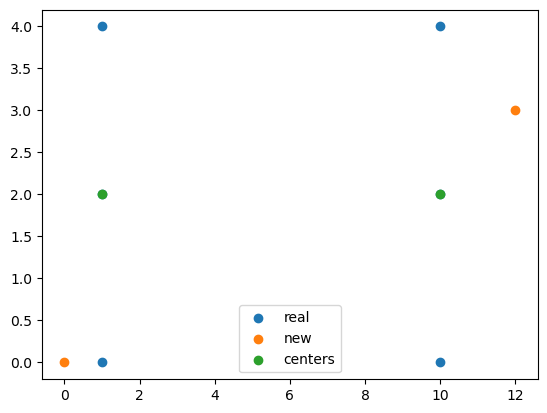

In [8]:
plt.scatter(X[:, 0], X[:, 1], label='real')
plt.scatter(X_new[:, 0], X_new[:, 1], label='new')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label='centers')
plt.legend()
plt.show()

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=1)

# 군집 모형 생성
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [10]:
# 모형이 분류한 값
lbl = model.labels_
lbl

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0])

In [11]:
# 예측한 값
pred = model.predict(X)
print(pred)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [12]:
# 모델의 정확도
import sklearn.metrics as sm
sm.accuracy_score(y, pred)

0.34

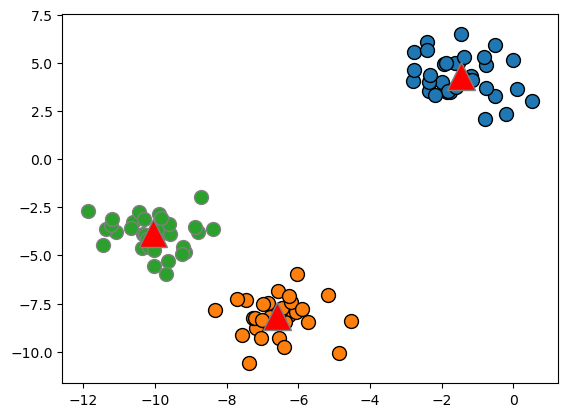

In [13]:
# 3개의 클러스터를 산점도로 표현
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers='o')

# centers
mglearn.discrete_scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2], markers='^', c='r', s=20)
plt.show()

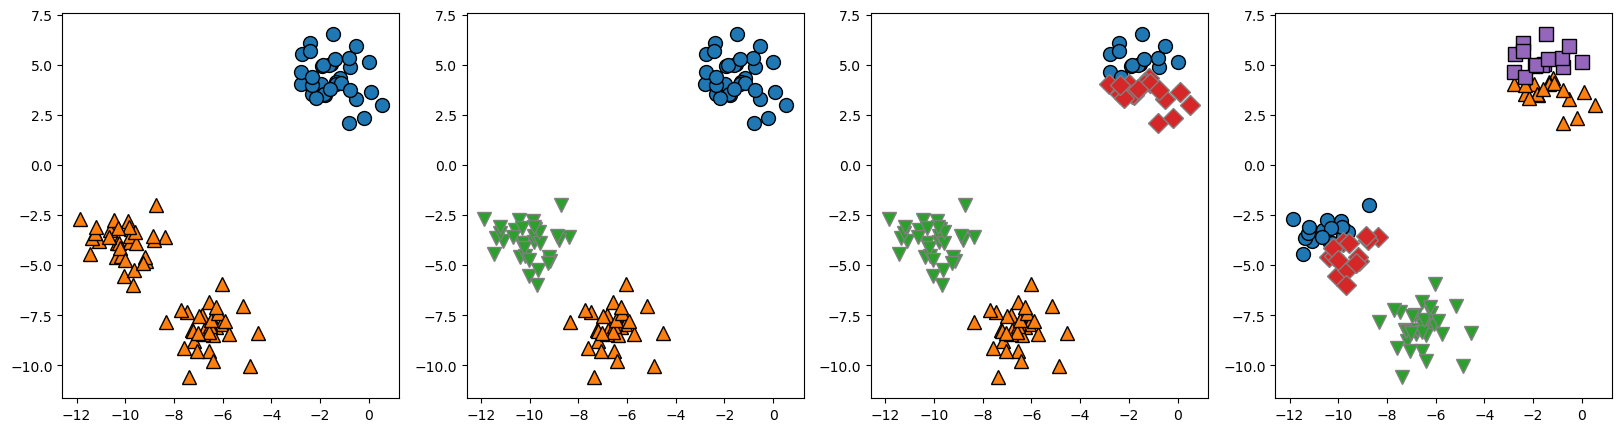

In [15]:
import matplotlib.pyplot as plt
# 같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음

# 1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2, 3, 4, 5개의 클러스터로 나눌 경우
idx = 0
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbls, ax=axes[idx])
    idx+=1